# Practice 2 of the Computational Mechanics course of the Simon Bolivar University

## Interpolation of curves using the Newtons polynomial

In [1]:
import numpy as np
from sympy import init_session
init_session(use_latex=True)
%matplotlib inline

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
def Newton(X:list, Y:list, xx, option: int):
    # Number of points
    nx = len(X)
    ny = len(Y)
    
    # Veifying that X and Y are lists
    if not isinstance(X, list):
        raise ValueError("X and Y arguments must be lists")
    elif not isinstance(Y, list):
        raise ValueError("X and Y arguments must be lists")
    # Checking that X,Y lists are the same size
    elif nx!=ny:
        raise ValueError("X,Y lists of values are not the same size")
    # Checking that there are no repeated values of X
    elif len(set(X))!=nx:
        List=[]
        for i in X:
            if List.count(i)>0:
                print(f"The value {i} of X is repeated\n",i)
            else:
                List.append(i)
        raise ValueError("There are repeated values of X")
    elif option!=1 and option!=2:
        raise ValueError("""The option argument 'option' should be:
        1-> for progressive polynomial
        2-> for regressive polynomial""")
    
    # Newton's interpolation method
    else:
        n = nx
        V0 = Matrix(X)
        V1 = Matrix(Y)
        # Calculation of Divided differences matrix
        M = zeros(n, n+1)
        M[:,0] = V0
        M[:,1] = V1
        for k in range(2,n+1):
            for i in range(n-(k-1)):
                M[i,k] = (M[i+1,k-1]-M[i,k-1])/(X[i+(k-1)]-X[i])
                
        # Creation of interpolating polynomial
        # For forward polynomial
        if option == 1:
            # Collecting the coefficients
            A = zeros(n,1)
            for i in range(n):
                A[i] = M[0,i+1] 
            # Building the polynomial    
            Pol = A[0]
            for i in range(1,n):
                mult = 1
                for j in range(i):
                    mult *= (x-X[j])
                sum = A[i]*mult
                Pol += sum
        # For backward polynomial
        else:
            B = zeros(n,1)
            pass
        
        # Interpolation
        yy = Pol.subs(x,S(xx))
        # Graphics
        p1 = plot(Pol, show=True)
        
    return(yy,M,Pol)

In [3]:
X = [0,2,3,10,12]
Y = [-1,1,2,3,4]

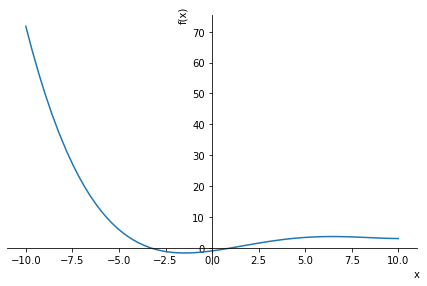

In [4]:
yy, M, P = Newton(X,Y,1,1)

In [5]:
P

C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
Th

In [6]:
simplify(P)

In [7]:
M

⎡0   -1   1     0    -3/280  2/945⎤
⎢                                 ⎥
⎢                      37         ⎥
⎢2   1    1   -3/28   ────     0  ⎥
⎢                     2520        ⎥
⎢                                 ⎥
⎢3   2   1/7  5/126    0       0  ⎥
⎢                                 ⎥
⎢10  3   1/2    0      0       0  ⎥
⎢                                 ⎥
⎣12  4    0     0      0       0  ⎦

In [8]:
yy